In [3]:
# Imports label encoding utilities
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency

# Function to convert age (years/months) into days
def age_to_days(age):
    if 'year' in age:
        years = int(age.split()[0]) # Capture the numeric value before the "year" substring
        return years * 364 # Converts year to days (1 year == 364 days)
    elif 'month' in age:
        months = int(age.split()[0]) # Captures the numeric value before the "month" substring
        return months * 30 # Converts month to weeks (1 month == 30 days)
    elif 'week' in age:
        week = int(age.split()[0]) # Captures the numeric value before the "week" substring
        return week * 7
    else:
        day = int(age.split()[0])
        return day # If there is a value outside the expected parameters

# Color Mapping Dictionary
color_map = {
    'orange': ['orange', 'red', 'tan', 'buff', 'flame'],
    'black': ['black', 'seal', 'brown brindle', 'torbie', 'tortie', 'tricolor', 'calico'],
    'white': ['white', 'cream'],
    'brown': ['brown', 'chocolate', 'fawn'],
    'grey': ['gray', 'blue', 'silver'],
    'yellow': ['yellow'],
}

# Function to map a specific color to a primary color
def map_color(color):
    color = color.lower()  # Converts to lowercase for easier comparison
    for primary_color, color_list in color_map.items():
        for specific_color in color_list:
            if specific_color in color:
                return primary_color
    return color  # If the color is not in the mapping, we keep it as it is

# Function to treat multiple colors (color transition)
def handle_multiple_colors(color):
    # Separates colors that are with '/' or ' '
    if '/' in color:
        colors = color.split('/')
    elif ' ' in color:
        colors = color.split(' ')
    else:
        colors = [color]

    # Maps each color separately
    mapped_colors = [map_color(c) for c in colors]

    # Returns the combined colors (e.g. 'orange/white')
    return '/'.join(mapped_colors)

def match_duplicates(color):
    
    # Erases multiple spaces
    color = ' '.join(color.split())
    
    # Splits colors by "/"
    if '/' in color:
        colors = color.split('/')
    else:
        colors = color.split(' ')
    
    # Removes duplicates
    unique_colors = list(dict.fromkeys(colors))
    
    # Recombines non-duplicate colors in only one string, separated by "/"
    return '/'.join(unique_colors)
        

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Loads the data
df = pd.read_csv('Dataset/train.csv')

# View the data
display(df)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


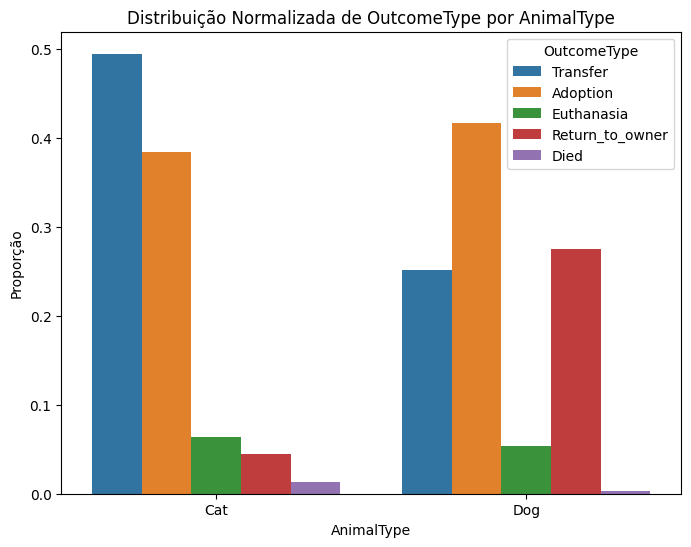

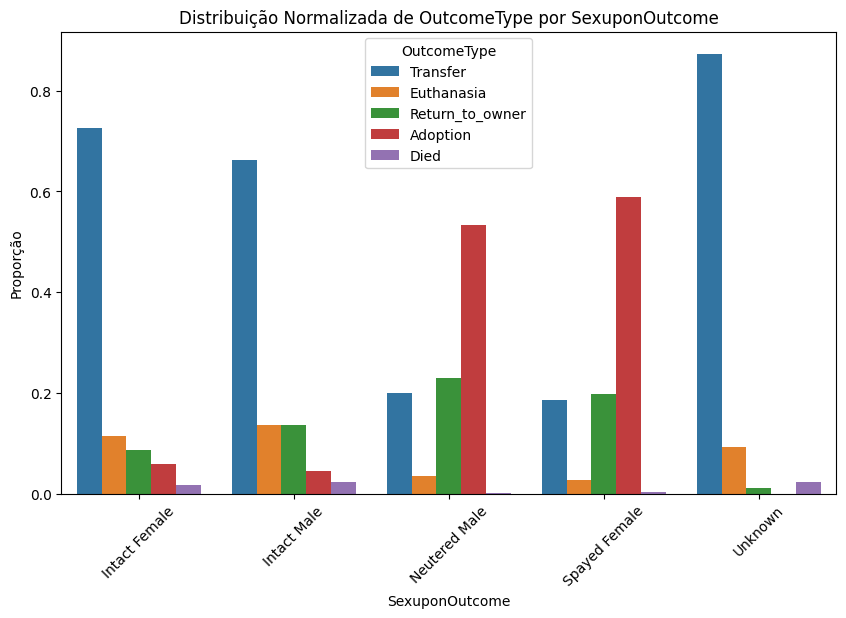

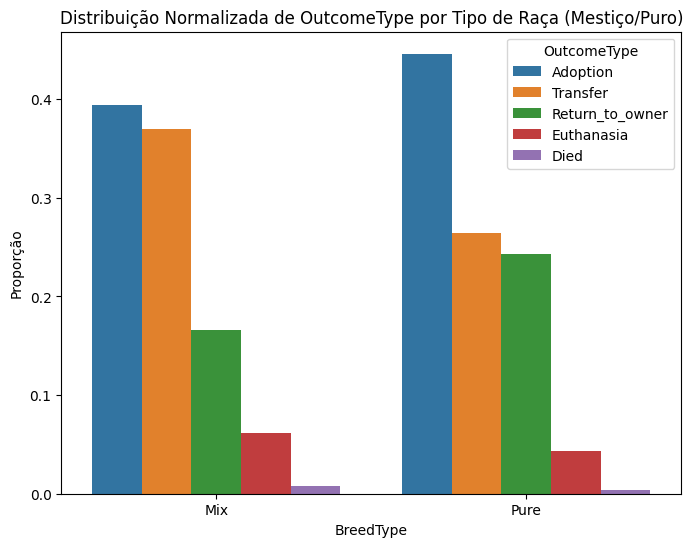

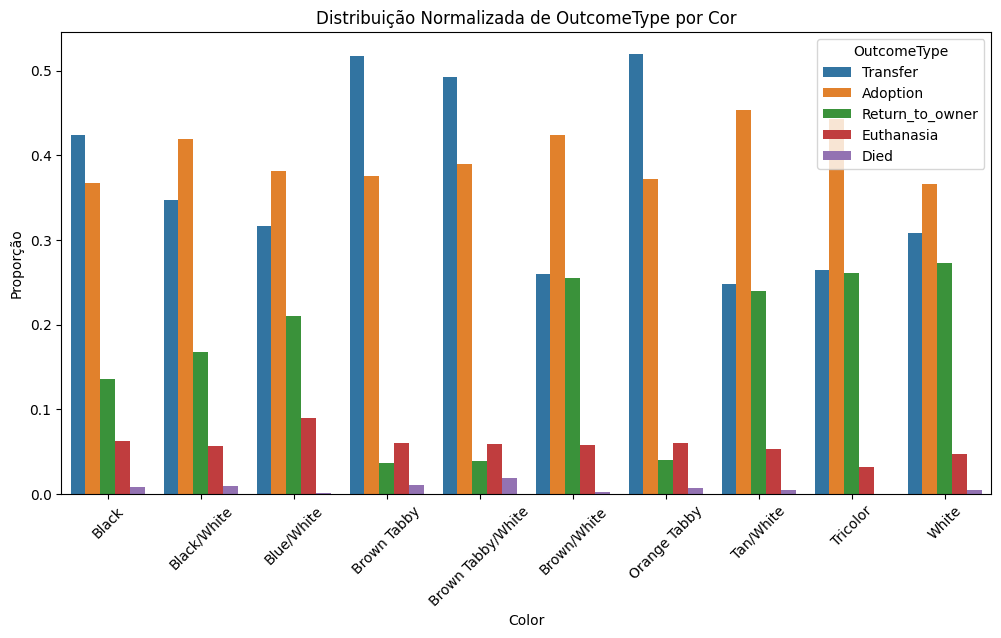

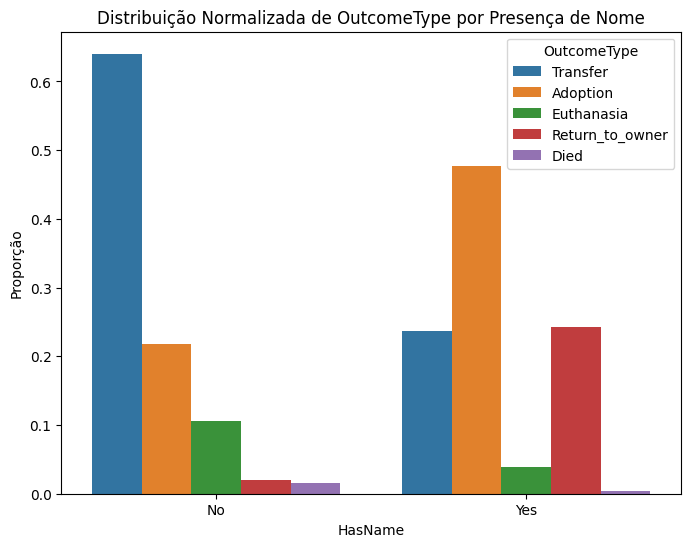

In [5]:
# 1. Calcular a proporção de OutcomeType dentro de cada AnimalType
normalized_counts_animal = df.groupby('AnimalType')['OutcomeType'].value_counts(normalize=True).rename('Proportion').reset_index()

# Plotar o gráfico de barras normalizado para AnimalType
plt.figure(figsize=(8, 6))
sns.barplot(x='AnimalType', y='Proportion', hue='OutcomeType', data=normalized_counts_animal)
plt.title('Distribuição Normalizada de OutcomeType por AnimalType')
plt.ylabel('Proporção')
plt.show()

# 2. Calcular a proporção de OutcomeType dentro de cada SexuponOutcome
normalized_counts_sex = df.groupby('SexuponOutcome')['OutcomeType'].value_counts(normalize=True).rename('Proportion').reset_index()

# Plotar o gráfico de barras normalizado para SexuponOutcome
plt.figure(figsize=(10, 6))
sns.barplot(x='SexuponOutcome', y='Proportion', hue='OutcomeType', data=normalized_counts_sex)
plt.title('Distribuição Normalizada de OutcomeType por SexuponOutcome')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.show()

# 3. Calcular a proporção de OutcomeType dentro de cada Breed (Mestiço/Puro)
# Cria uma coluna indicando se a raça é mista
df['BreedType'] = df['Breed'].apply(lambda x: 'Mix' if 'Mix' in x else 'Pure')
normalized_counts_breed = df.groupby('BreedType')['OutcomeType'].value_counts(normalize=True).rename('Proportion').reset_index()

# Plotar o gráfico de barras normalizado para BreedType
plt.figure(figsize=(8, 6))
sns.barplot(x='BreedType', y='Proportion', hue='OutcomeType', data=normalized_counts_breed)
plt.title('Distribuição Normalizada de OutcomeType por Tipo de Raça (Mestiço/Puro)')
plt.ylabel('Proporção')
plt.show()

# 4. Calcular a proporção de OutcomeType dentro de cada Color
# Para melhor visualização, vamos agrupar apenas as 10 cores mais comuns
top_colors = df['Color'].value_counts().nlargest(10).index
normalized_counts_color = df[df['Color'].isin(top_colors)].groupby('Color')['OutcomeType'].value_counts(normalize=True).rename('Proportion').reset_index()

# Plotar o gráfico de barras normalizado para Color
plt.figure(figsize=(12, 6))
sns.barplot(x='Color', y='Proportion', hue='OutcomeType', data=normalized_counts_color)
plt.title('Distribuição Normalizada de OutcomeType por Cor')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.show()

# 5. Calcular a proporção de OutcomeType dentro de ter ou não ter nome
df['HasName'] = df['Name'].apply(lambda x: 'Yes' if pd.notna(x) and x != '' else 'No')
normalized_counts_name = df.groupby('HasName')['OutcomeType'].value_counts(normalize=True).rename('Proportion').reset_index()

df = df.drop(columns=['Name'])

# Plotar o gráfico de barras normalizado para HasName
plt.figure(figsize=(8, 6))
sns.barplot(x='HasName', y='Proportion', hue='OutcomeType', data=normalized_counts_name)
plt.title('Distribuição Normalizada de OutcomeType por Presença de Nome')
plt.ylabel('Proporção')
plt.show()

In [6]:
# Data processing
df = df.drop(columns=['AnimalID','OutcomeSubtype']) #Remove useless columns

# Applies treatment to multiple colors in the 'Color' column
df['Mapped_Color'] = df['Color'].apply(handle_multiple_colors)

# Groups duplicated colors that are separated by "/" in only one color
df['Mapped_Color'] = df['Mapped_Color'].apply(match_duplicates)


# Part dedicated to group all the rare colors into the 'Other_Colors' category
color_counts = df['Mapped_Color'].value_counts()

# Defines a frequency threshold for rare colors ( currently given as 1% of the amount of examples in the dataset)
threshold = 300
rare_colors = color_counts[color_counts < threshold].index

# Substitutes the rare colors for the column 'Other_colors'
df['Mapped_Color'] = df['Mapped_Color'].apply(lambda x: 'Other_Colors' if x in rare_colors else x)

# Applies One-Hot Encoding to 'Mapped_Color'
mapped_color_dummies = pd.get_dummies(df['Mapped_Color'])

# Converte valores booleanos (True/False) para inteiros (0/1)
mapped_color_dummies = mapped_color_dummies.astype(int)

# Drops na values especifically in this point, since the most where names and OutcomeSubtypes (which are all treated)
df = df.dropna()

# Converts 'AgeuponOutcome' to weeks
df['AgeuponOutcomeDays'] = df['AgeuponOutcome'].apply(age_to_days) # Converting months and years to weeks

display(df)


,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,BreedType,HasName,Mapped_Color,AgeuponOutcomeDays
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Mix,Yes,brown/white,364
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Mix,Yes,Other_Colors,364
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Mix,Yes,grey/white,728
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Mix,No,grey/white,21
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Pure,No,orange,728
...,...,...,...,...,...,...,...,...,...,...,...
26724,2015-05-14 11:56:00,Transfer,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,Mix,No,brown/white,30
26725,2016-01-20 18:59:00,Transfer,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,Mix,No,brown/tabby,90
26726,2015-03-09 13:33:00,Adoption,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,Mix,Yes,white/orange,1456
26727,2014-04-27 12:22:00,Transfer,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,Mix,No,black,28


In [7]:
#Exploratory data analysis with statistics

# Defines discrete intervals (bins) every 364 days, from 0 to 7287
bins = np.arange(0, 7287, 364)  # This creates 52 week intervals (which is around 1 year)

# 0) Name column ratio analysis
outcome_proportion = df['HasName'].value_counts(normalize=True)*100 # Normalize returns the proportion of each element == Num_ElementX/Num_total
print("Proporção de nomes (sim/não):")
print(outcome_proportion)

# 1) OutcomeType column ratio analysis
outcome_proportion = df['OutcomeType'].value_counts(normalize=True)*100 # Normalize returns the proportion of each element == Num_ElementX/Num_total
print("\nProporção de cada item do OutcomeType:")
print(outcome_proportion)

# 2) AnimalType column ratio analysis
animal_proportion = df['AnimalType'].value_counts(normalize=True)*100
print("\nProporção de cada item do AnimalType:")
print(animal_proportion)

# 3) Proportion analysis of the Breed column (Mestiza X Pure)
# Creation of a subtable for mixed or pure breed classification and label-encoding
df['Breed'] = df['Breed'].apply(lambda x: 0 if 'Mix' in x else 1)  # lambda x is a temporary function that takes as input the parameter x (element of the breed column)
df['BreedType'] = df['Breed']
df = df.drop(columns=['Breed'])
breed_proportion = df['BreedType'].value_counts(normalize=True)*100
print("\nProporção de BreedType (Mestiça/Pura)")
print(breed_proportion)

# 4) AgeuponOutcome column ratio analysis# Create a column that indicates which range each 'Age_in_Weeks' value falls into
df['Intervalo'] = pd.cut(df['AgeuponOutcomeDays'], bins=bins, right=False)
frequencia_absoluta = df['Intervalo'].value_counts().sort_index() # Calculate absolute frequency (number of observations in each interval)
frequencia_relativa = frequencia_absoluta / len(df) * 100 # Calculate relative frequency (proportion of observations in each interval)

# Create a table with absolute and relative frequencies
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': frequencia_absoluta,
    'Frequência Relativa (%)': frequencia_relativa
})

print("\nProporção de AgeuponOutcome (em semanas)")
print(tabela_frequencia)

# 5) SexuponOutcome column ratio analysis
# A) Proportion of castrated and non-castrated
castrated_proportion = df['SexuponOutcome'].apply(lambda x: 'Castrado' if 'Spayed' in x or 'Neutered' in x else 'Não Castrado').value_counts(normalize=True) * 100
print("\nProporção Castrados e Não Castrados:")
print(castrated_proportion)

# B) Proportion of Females and Males
gender_proportion = df['SexuponOutcome'].apply(lambda x: 'Macho' if 'Male' in x else 'Fêmea').value_counts(normalize=True) * 100
print("\nProporção de Machos e Fêmeas:")
print(gender_proportion)

# C) Proportion of females and males castrated and not castrated
gender_castrated_proportion = df['SexuponOutcome'].apply(lambda x:
    'Macho Castrado' if 'Neutered Male' in x else
    'Macho Não Castrado' if 'Intact Male' in x else
    'Fêmea Castrada' if 'Spayed Female' in x else
    'Fêmea Não Castrada').value_counts(normalize=True) * 100
print("\nProporção de Machos e Fêmeas (Castrados e Não Castrados):")
print(gender_castrated_proportion)

# Filter only Females (Spayed Female and Intact Female)
females_only = df['SexuponOutcome'].apply(lambda x: 'Fêmea Castrada' if 'Spayed Female' in x else 'Fêmea Não Castrada' if 'Intact Female' in x else None)

# Remove None values ​​(if they are males or unknown values)
females_only = females_only.dropna()

# Calculate the proportion of castrated and uncastrated females
gender_castrated_proportion = females_only.value_counts(normalize=True) * 100
print("\nProporção de Fêmeas (Castradas e Não Castradas):")
print(gender_castrated_proportion)

# Filter only Males (Neutered Male and Intact Male)
males_only = df['SexuponOutcome'].apply(lambda x: 'Macho Castrado' if 'Neutered Male' in x else 'Macho Não Castrado' if 'Intact Male' in x else None)

# Remove None values ​​(if they are females or unknown values)
males_only = males_only.dropna()

# Calculate the proportion of castrated and uncastrated males
gender_castrated_proportion = males_only.value_counts(normalize=True) * 100
print("\nProporção de Machos (Castrados e Não Castrados):")
print(gender_castrated_proportion)

# 6) Color column proportion analysis
color_proportion = df['Color'].value_counts(normalize=True)*100
print("\nProporção de Color:")
print(len(color_proportion))

color_proportion = df['Mapped_Color'].value_counts(normalize=True)*100
print("\nProporção de Mapped_Color:")
print(len(color_proportion))


display(df)

  

Proporção de nomes (sim/não):
HasName
Yes    71.272931
No     28.727069
Name: proportion, dtype: float64

Proporção de cada item do OutcomeType:
OutcomeType
Adoption           40.318233
Transfer           35.215275
Return_to_owner    17.914639
Euthanasia          5.814302
Died                0.737551
Name: proportion, dtype: float64

Proporção de cada item do AnimalType:
AnimalType
Dog    58.378884
Cat    41.621116
Name: proportion, dtype: float64

Proporção de BreedType (Mestiça/Pura)
BreedType
0    83.414452
1    16.585548
Name: proportion, dtype: float64

Proporção de AgeuponOutcome (em semanas)
              Frequência Absoluta  Frequência Relativa (%)
Intervalo                                                 
[0, 364)                    11890                44.515163
[364, 728)                   3969                14.859603
[728, 1092)                  3742                14.009734
[1092, 1456)                 1823                 6.825159
[1456, 1820)                 1071       

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Color,BreedType,HasName,Mapped_Color,AgeuponOutcomeDays,Intervalo
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Brown/White,0,Yes,brown/white,364,"[364, 728)"
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Cream Tabby,0,Yes,Other_Colors,364,"[364, 728)"
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Blue/White,0,Yes,grey/white,728,"[728, 1092)"
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Blue Cream,0,No,grey/white,21,"[0, 364)"
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Tan,1,No,orange,728,"[728, 1092)"
...,...,...,...,...,...,...,...,...,...,...,...
26724,2015-05-14 11:56:00,Transfer,Cat,Intact Male,1 month,Brown Tabby/White,0,No,brown/white,30,"[0, 364)"
26725,2016-01-20 18:59:00,Transfer,Cat,Spayed Female,3 months,Brown Tabby,0,No,brown/tabby,90,"[0, 364)"
26726,2015-03-09 13:33:00,Adoption,Dog,Neutered Male,4 years,White/Tan,0,Yes,white/orange,1456,"[1456, 1820)"
26727,2014-04-27 12:22:00,Transfer,Cat,Intact Male,4 weeks,Black,0,No,black,28,"[0, 364)"


In [8]:
# Categoric to numerical data conversion + useless column drop



# Drops 'Mapped_Color' to leave just the other color columns
df = df.drop(columns=['Mapped_Color'])

# Drops unprocessed/irrelevant columns
df = df.drop(columns=['Color', 'DateTime', 'AgeuponOutcome', 'Intervalo'])

# Concatenates the new One-Hot Encoding columns to the DataFrame
df = pd.concat([df, mapped_color_dummies], axis=1)

# Applies Label Encoding to 'AnimalType'
label_encoder_animal = LabelEncoder()
df['AnimalType'] = label_encoder_animal.fit_transform(df['AnimalType'])

# Applies Label Encoding to 'OutcomeType'
label_encoder_outcome = LabelEncoder()
df['OutcomeType'] = label_encoder_outcome.fit_transform(df['OutcomeType'])


# Optar pelo comportamento futuro definido no aviso
pd.set_option('future.no_silent_downcasting', True)

# Aplicar a substituição
df['HasName'] = df['HasName'].replace({'Yes': 1, 'No': 0})

# Verificar a conversão
print(df['HasName'].head())

# Applies One-Hot Encoding to 'SexuponOutcome'
df = pd.get_dummies(df, columns=['SexuponOutcome'], prefix='')

# Drops the values that turned to NaN during conversion
df = df.dropna()

# Converts boolean values (True/False) to integers (0/1)
df['_Intact Female'] = df['_Intact Female'].astype(int)

df['_Intact Male'] = df['_Intact Male'].astype(int)

df['_Neutered Male'] = df['_Neutered Male'].astype(int)

df['_Spayed Female'] = df['_Spayed Female'].astype(int)

df['_Unknown'] = df['_Unknown'].astype(int)

df['HasName'] = df['HasName'].astype(int)

df['BreedType'] = df['BreedType'].astype(int)



# Showa the processed table with most numeric values

print('Dataset modificado')
display(df)



0    1
1    1
2    1
3    0
4    0
Name: HasName, dtype: object
Dataset modificado


,OutcomeType,AnimalType,BreedType,HasName,AgeuponOutcomeDays,Other_Colors,black,black/brown,black/orange,black/white,...,orange/white,white,white/black,white/brown,white/orange,_Intact Female,_Intact Male,_Neutered Male,_Spayed Female,_Unknown
0,3,1,0,1,364.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,1,364.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,1,728.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,21.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,1,1,0,728.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,4,0,0,0,30.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26725,4,0,0,0,90.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26726,0,1,0,1,1456.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
26727,4,0,0,0,28.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separates attributes and class to preserve the discrete characteristic of the class (OutcomeType)
X = df.drop(columns=['OutcomeType'])  # Attributes
y = df['OutcomeType']  # Class

# 1. Selecionar apenas as colunas numéricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# 2. Aplicar MinMaxScaler às colunas numéricas
min_max_scaler = MinMaxScaler()
X[numeric_cols] = min_max_scaler.fit_transform(X[numeric_cols])

# Verificar o DataFrame após MinMaxScaler
print("DataFrame após MinMaxScaler:")
display(X)

# 3. Aplicar StandardScaler às colunas numéricas (Se necessário após a normalização)
standard_scaler = StandardScaler()
X[numeric_cols] = standard_scaler.fit_transform(X[numeric_cols])

# Verificar o DataFrame após StandardScaler
print("DataFrame após StandardScaler:")
display(X)

df = X
df['OutcomeType'] = y

display(df)


DataFrame após MinMaxScaler:


,AnimalType,BreedType,HasName,AgeuponOutcomeDays,Other_Colors,black,black/brown,black/orange,black/white,brown,...,orange/white,white,white/black,white/brown,white/orange,_Intact Female,_Intact Male,_Neutered Male,_Spayed Female,_Unknown
0,1.0,0.0,1.0,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.050000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.002885,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,0.0,0.0,0.0,0.004121,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26725,0.0,0.0,0.0,0.012363,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26726,1.0,0.0,1.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
26727,0.0,0.0,0.0,0.003846,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


DataFrame após StandardScaler:


,AnimalType,BreedType,HasName,AgeuponOutcomeDays,Other_Colors,black,black/brown,black/orange,black/white,brown,...,orange/white,white,white/black,white/brown,white/orange,_Intact Female,_Intact Male,_Neutered Male,_Spayed Female,_Unknown
0,0.844363,-0.445907,0.634868,-0.396393,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.258992,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,-0.389538,1.315813,-0.702089,-0.206165
1,-1.184325,-0.445907,0.634868,-0.396393,2.828844,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.258992,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,-0.389538,-0.759987,1.424320,-0.206165
2,0.844363,-0.445907,0.634868,-0.059276,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.258992,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,-0.389538,1.315813,-0.702089,-0.206165
3,-1.184325,-0.445907,-1.575131,-0.714061,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.258992,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,2.567143,-0.759987,-0.702089,-0.206165
4,0.844363,2.242620,-1.575131,-0.059276,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.258992,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,-0.389538,1.315813,-0.702089,-0.206165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,-1.184325,-0.445907,-1.575131,-0.705726,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.258992,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,2.567143,-0.759987,-0.702089,-0.206165
26725,-1.184325,-0.445907,-1.575131,-0.650157,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.258992,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,-0.389538,-0.759987,1.424320,-0.206165
26726,0.844363,-0.445907,0.634868,0.614958,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.258992,-0.222228,-0.180416,-0.165966,6.659433,-0.388581,-0.389538,1.315813,-0.702089,-0.206165
26727,-1.184325,-0.445907,-1.575131,-0.707578,-0.353501,2.207467,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.258992,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,2.567143,-0.759987,-0.702089,-0.206165


,AnimalType,BreedType,HasName,AgeuponOutcomeDays,Other_Colors,black,black/brown,black/orange,black/white,brown,...,white,white/black,white/brown,white/orange,_Intact Female,_Intact Male,_Neutered Male,_Spayed Female,_Unknown,OutcomeType
0,0.844363,-0.445907,0.634868,-0.396393,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,-0.389538,1.315813,-0.702089,-0.206165,3
1,-1.184325,-0.445907,0.634868,-0.396393,2.828844,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,-0.389538,-0.759987,1.424320,-0.206165,2
2,0.844363,-0.445907,0.634868,-0.059276,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,-0.389538,1.315813,-0.702089,-0.206165,0
3,-1.184325,-0.445907,-1.575131,-0.714061,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,2.567143,-0.759987,-0.702089,-0.206165,4
4,0.844363,2.242620,-1.575131,-0.059276,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,-0.389538,1.315813,-0.702089,-0.206165,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,-1.184325,-0.445907,-1.575131,-0.705726,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,2.567143,-0.759987,-0.702089,-0.206165,4
26725,-1.184325,-0.445907,-1.575131,-0.650157,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,-0.389538,-0.759987,1.424320,-0.206165,4
26726,0.844363,-0.445907,0.634868,0.614958,-0.353501,-0.453008,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.222228,-0.180416,-0.165966,6.659433,-0.388581,-0.389538,1.315813,-0.702089,-0.206165,0
26727,-1.184325,-0.445907,-1.575131,-0.707578,-0.353501,2.207467,-0.132962,-0.16525,-0.392211,-0.182726,...,-0.222228,-0.180416,-0.165966,-0.150163,-0.388581,2.567143,-0.759987,-0.702089,-0.206165,4


In [10]:
# Starting the classification step

from sklearn.model_selection import train_test_split

# Separation of the class and attributes columns
X = df.drop(columns=['OutcomeType'])  # Attributes
y = df['OutcomeType']  # Class

# Split the dataset into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.decomposition import PCA

# Aplicar PCA e reduzir as dimensões
pca = PCA(n_components=0.95)  # Retém 95% da variância
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



print(f'Tamanho do conjunto de treino: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')

Tamanho do conjunto de treino: (21368, 28)
Tamanho do conjunto de teste: (5342, 28)


In [11]:
# Randon Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=800, criterion='entropy', random_state=42)
rf_model.fit(X_train_pca, y_train)

# Predicts on the test set
rf_predictions = rf_model.predict(X_test_pca)

# Returns the model accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Acurácia: {rf_accuracy:.4f}')
print(classification_report(y_test, rf_predictions))

Random Forest Acurácia: 0.5975
              precision    recall  f1-score   support

           0       0.63      0.77      0.69      2147
           1       0.00      0.00      0.00        34
           2       0.37      0.20      0.26       330
           3       0.39      0.34      0.37       940
           4       0.68      0.61      0.64      1891

    accuracy                           0.60      5342
   macro avg       0.41      0.38      0.39      5342
weighted avg       0.58      0.60      0.59      5342



In [12]:
# Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Treinar o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_pca, y_train)

# Predicts on the test set
dt_predictions = dt_model.predict(X_test_pca)

# Returns the model accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Acurácia: {dt_accuracy:.4f}')
print(classification_report(y_test, dt_predictions))


Decision Tree Acurácia: 0.5906
              precision    recall  f1-score   support

           0       0.61      0.79      0.69      2147
           1       0.00      0.00      0.00        34
           2       0.31      0.21      0.25       330
           3       0.39      0.33      0.36       940
           4       0.70      0.57      0.63      1891

    accuracy                           0.59      5342
   macro avg       0.40      0.38      0.39      5342
weighted avg       0.58      0.59      0.58      5342



In [13]:
# K-Nearest-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

# Training the model
knn_model = KNeighborsClassifier(n_neighbors=9)  # Pode ajustar 'n_neighbors'
knn_model.fit(X_train_pca, y_train)

# Predicts on the test set
knn_predictions = knn_model.predict(X_test_pca)

# Returns the model accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'KNN Acurácia: {knn_accuracy:.4f}')
print(classification_report(y_test, knn_predictions))


print(f"Random Forest Acurácia: {rf_accuracy:.4f}")
print(f"Decision Tree Acurácia: {dt_accuracy:.4f}")
print(f"KNN Acurácia: {knn_accuracy:.4f}")

KNN Acurácia: 0.6073
              precision    recall  f1-score   support

           0       0.61      0.80      0.70      2147
           1       0.00      0.00      0.00        34
           2       0.44      0.11      0.17       330
           3       0.41      0.35      0.38       940
           4       0.70      0.61      0.65      1891

    accuracy                           0.61      5342
   macro avg       0.43      0.37      0.38      5342
weighted avg       0.59      0.61      0.59      5342

Random Forest Acurácia: 0.5975
Decision Tree Acurácia: 0.5906
KNN Acurácia: 0.6073


/home/felli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/felli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/felli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
